In [1]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials

In [2]:
aapl_df = yf.download('AAPL', 
                      start='1992-01-01', 
                      end='2021-06-12', 
                      progress=False,
)
aapl_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1992-01-02,0.497768,0.533482,0.495536,0.531250,0.434326,233632000
1992-01-03,0.535714,0.537946,0.520089,0.526786,0.430676,190254400
1992-01-06,0.524554,0.526786,0.515625,0.517857,0.423376,114240000
1992-01-07,0.513393,0.531250,0.513393,0.527902,0.431589,141467200
1992-01-08,0.522321,0.546875,0.522321,0.540179,0.441626,232747200


In [3]:
aapl_df = yf.download('AAPL')

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:title={'center':"'s stock price"}, xlabel='Date'>

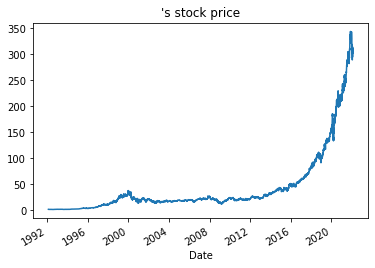

In [4]:
stock='MSFT'
ticker = yf.Ticker(stock)
aapl_df = ticker.history(period="30y")
aapl_df['Close'].plot(title="'s stock price")

Calculate Correlation Between Two Stocks
From https://paulconnollywriter.medium.com/calculate-correlation-between-two-stocks-a737de2cdbd0

In [5]:
spy = yf.Ticker("SPY")
spy_hist = spy.history(period="1y")

In [6]:
aapl = yf.Ticker("AAPL")
aapl_hist = aapl.history(period="1y")

In [7]:
spy_dataframe = pd.DataFrame.from_dict(spy_hist)
aapl_dataframe = pd.DataFrame.from_dict(aapl_hist)

In [8]:
spy_dataframe = spy_dataframe.pct_change()
aapl_dataframe = aapl_dataframe.pct_change()

In [9]:
spy_dataframe.drop(['Volume','Dividends','Stock Splits'], axis=1)
aapl_dataframe.drop(['Volume','Dividends','Stock Splits'], axis=1)

,Open,High,Low,Close
Date,,,,
2021-02-12,NaN,NaN,NaN,NaN
2021-02-16,0.008485,0.003541,-0.006732,-0.016104
2021-02-17,-0.031294,-0.027865,-0.025002,-0.017644
2021-02-18,-0.015619,-0.016790,-0.015911,-0.008637
2021-02-19,0.008050,0.005462,0.010910,0.001233
...,...,...,...,...
2022-02-07,0.006873,-0.000862,0.001582,-0.004235
2022-02-08,-0.006537,0.008048,0.002808,0.018467
2022-02-09,0.025156,0.007414,0.020242,0.008294


In [10]:
correlation = spy_dataframe['Close'].corr(aapl_dataframe['Close'])
print("Correlation is: ", correlation)
correlation2 = spy_dataframe['Open'].corr(aapl_dataframe['Open'])
print("Correlation is: ", correlation2)
correlation3 = spy_dataframe['High'].corr(aapl_dataframe['High'])
print("Correlation is: ", correlation3)
correlation4 = spy_dataframe['Low'].corr(aapl_dataframe['Low'])
print("Correlation is: ", correlation4)

Correlation is:  0.7419770937916529
Correlation is:  0.7346851099956238
Correlation is:  0.6394426535294764
Correlation is:  0.6980170993120635


In [11]:
import numpy as np
total = np.array([[correlation],[correlation2],[correlation3],[correlation4]])
np.mean(total)

0.7035304891572041

Correlation of multiple Stocks
https://seaborn.pydata.org/examples/scatterplot_matrix.html
https://seaborn.pydata.org/tutorial/axis_grids.html
https://algotrading101.com/learn/yfinance-guide/#Demo-with-multiple-tickers
https://openbase.com/python/yfinance/documentation
https://pypi.org/project/yfinance/
https://stackoverflow.com/questions/63107594/how-to-deal-with-multi-level-column-names-downloaded-with-yfinance/63107801#63107801
https://www.statology.org/pandas-convert-index-to-column/
https://www.statology.org/pandas-reset-index/
https://www.statology.org/pandas-set-column-as-index/

In [12]:
# download dataframe

data_download = yf.download("AMZN AAPL GOOG", start="2017-01-01", end="2017-04-30")

[*********************100%***********************]  3 of 3 completed


In [14]:
from pandas_datareader import data as pdr
yf.pdr_override() # <== that's all it takes :-)


In [15]:
# download dataframe
yf.pdr_override() # <== that's all it takes :-)
data = pdr.get_data_yahoo("SPY MFST FB CRM", start="2017-01-01", end="2022-02-11")


[*********************100%***********************]  4 of 4 completed


In [16]:
data.head()

Adj Close                                   Close              \
                  CRM          FB MFST         SPY        CRM          FB   
Date                                                                        
2017-01-03  70.540001  116.860001  3.2  206.147522  70.540001  116.860001   
2017-01-04  72.800003  118.690002  2.8  207.373962  72.800003  118.690002   
2017-01-05  72.790001  120.669998  2.8  207.209198  72.790001  120.669998   
2017-01-06  73.800003  123.410004  3.1  207.950546  73.800003  123.410004   
2017-01-09  73.959999  124.900002  3.3  207.264114  73.959999  124.900002   

                                  High              ...  Low              \
           MFST         SPY        CRM          FB  ... MFST         SPY   
Date                                                ...                    
2017-01-03  3.2  225.240005  70.860001  117.839996  ...  3.0  223.880005   
2017-01-04  2.8  226.580002  73.070000  119.660004  ...  2.7  225.610001   
2017-01-05  2.8  226.399994  73.660004  120.949997  ...  2.7  225.479996   
2017-01-06  3.1  227.210007  74.129997  123.879997  ...  2.8  225.899994   
2017-01-09  3.3  226.460007  74.440002  125.430000  ...  2.8  226.419998   

                 Open                                Volume                  \
                  CRM          FB MFST         SPY      CRM        FB  MFST   
Date                                                                          
2017-01-03  69.290001  116.029999  3.5  225.039993  8112200  20663900  6666   
2017-01-04  71.080002  117.550003  3.1  225.619995  9289500  19630900  4405   
2017-01-05  72.809998  118.860001  2.8  226.270004  4695600  19492200  6567   
2017-01-06  72.889999  120.980003  2.9  226.529999  4466100  28545300  3312   
2017-01-09  74.050003  123.550003  3.1  226.910004  3933100  22880400  4383   

                      
                 SPY  
Date                  
2017-01-03  91366500  
2017-01-04  78744400  
2017-01-05  78379000  
2017-01-06  71559900  
2017-01-09  46939700  

[5 rows x 24 columns]

In [17]:
data["Close"].head()

,CRM,FB,MFST,SPY
Date,,,,
2017-01-03,70.540001,116.860001,3.2,225.240005
2017-01-04,72.800003,118.690002,2.8,226.580002
2017-01-05,72.790001,120.669998,2.8,226.399994
2017-01-06,73.800003,123.410004,3.1,227.210007
2017-01-09,73.959999,124.900002,3.3,226.460007


In [19]:
data_close=data["Close"].pct_change()
data_close.reset_index(inplace=True)
#data_close['yearqr']=data_close['Date'].dt.to_period('Q')
data_close['Year']=data_close['Date'].dt.year
data_close['Quarter']=data_close['Date'].dt.quarter
data_close.set_index('Date')
data_close.drop(index=data_close.index[0], axis=0, inplace=True) 
data_close.head()

,Date,CRM,FB,MFST,SPY,Year,Quarter
1,2017-01-04,0.032039,0.015660,-0.125000,0.005949,2017,1
2,2017-01-05,-0.000137,0.016682,0.000000,-0.000794,2017,1
3,2017-01-06,0.013876,0.022707,0.107143,0.003578,2017,1
4,2017-01-09,0.002168,0.012074,0.064516,-0.003301,2017,1
5,2017-01-10,0.000270,-0.004404,0.030303,0.000000,2017,1


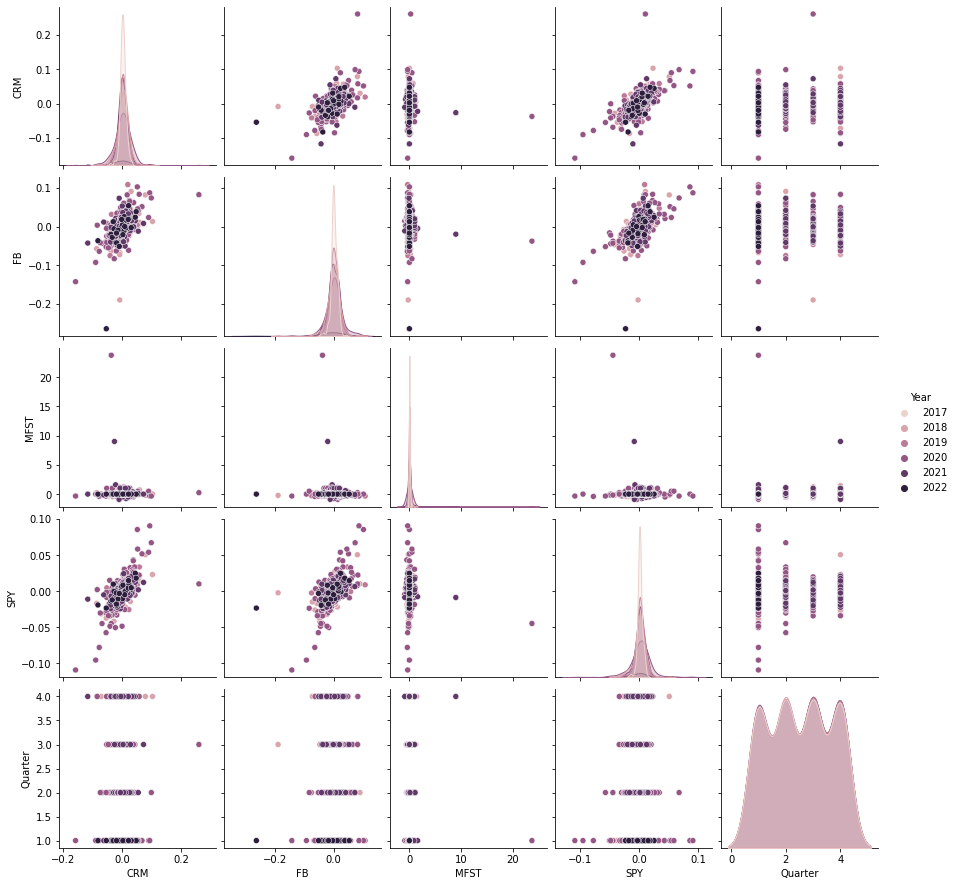

In [20]:
import seaborn as sns
sns.pairplot(data_close,hue="Year", height=2.5)

Correlation

In [21]:
data_close_corr=data_close.corr()


<AxesSubplot:>

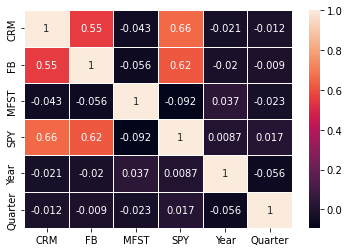

In [22]:

sns.heatmap(data_close_corr, annot = True, linewidths = 0.5)


Portfolio Allocation
https://pythonforfinance.net/2020/11/27/black-litterman-portfolio-allocation-model-in-python/
https://pyportfolioopt.readthedocs.io/en/latest/
https://blog.quantinsti.com/portfolio-management-strategy-python/
https://medium.com/codex/simulate-multi-asset-baskets-with-correlated-price-paths-using-python-472cbec4e379
https://medium.datadriveninvestor.com/compute-your-portfolio-risk-in-python-f1b87d338399

https://github.com/topics/portfolio-management

https://github.com/hudson-and-thames/mlfinlab
https://mlfinlab-dli.readthedocs.io/en/latest/index.html


libraries
https://pythonawesome.com/financial-portfolio-optimisation-in-python/

https://github.com/robertmartin8/PyPortfolioOpt
data:
https://github.com/robertmartin8/PyPortfolioOpt/tree/master/tests


https://github.com/EliteQuant/EliteQuant
https://github.com/fmilthaler/FinQuant
https://github.com/yuriak/RLQuant (Reinforcement Learning)

https://github.com/VivekPa/OptimalPortfolio

